Word Cloud from The Smiths Lyrics

I have recently learnt how to tokenise words from a corpus of tweets and use these words to create a wordcloud in Python. Wanting to practice this new skill, I decided to create wordclouds for the albums of my favourite band: The Smiths.

It's relatively easy to do and useful if you want to create nice visualizations of the buzzwords of your favourite book, songs, poems, or any other kind of text. All you need to start is create an excel file containing the text corpus that you wish to analyse. I will show you how to do the rest in the following tutorial.

The tutorial will use the following concepts: regular expressions, functions, tokenisation.

First you must import the following libraries.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import TweetTokenizer
import re 
import nltk

#nltk.download('punkt') ## use this in case you receive an error message


The second step is loading the excel file with your data. In my case, it is The Smiths' songs. I will start with their first studio album, and then apply the same code to their other albums, because I want to compare the results for the different albums to understand if there are any changes and what their meaning is. Of course, identifying buzzwords or keywords and putting them in a wordcloud can only say so much about an author's production, because by isolating the most common words we lose so much information - mainly the context in which a word is used. But I think it can be a nice of approaching the analysis of a text(s), because it gives a nice visualisation of the topics that are most important for an author.






Album: The Smiths

In [2]:
#Load the dataset
dataset = pd.read_excel('Exploring_Text_Data/the_smiths_lyrics.xlsx') #make sure that you use the correct path to your file here

dataset.head()

,Number,Title,Song
0,1,Reel Around the Fountain,It's time the tale were told\nOf how you took ...
1,2,You've got everything now,As merry as the days were long \nI was right a...
2,3,Miserable Lie,"So, goodbye\nPlease stay with your own kind\nA..."
3,4,Pretty Girls Make Graves,"Upon the sand, upon the bay\n""There is a quick..."
4,5,The Hand that Rocks the Cradle,Please don't cry\nFor the ghost and the storm ...


The following function will delete punctuations and non-alphabetical character that we don't need for outr purposes. Further, it will convert to lowercase, as some of the fucntions that we will use later are case sensitive.

In [3]:
#define function to clean the text

def clean_text(text):  
    #Remove punctuations
    for i in range(0,len(text)):
        text[i] = re.sub(r'[?!.('')";:,#@-]', ' ', text[i]) #deletes punctuation marks and symbols
    for i in range(0,len(text)):
        text[i] = text[i].lower() #Convert to lowercase to maintain consistency
    return text


The following code will create a copy of the song column, and the use the clean_text function on the copy.

In [4]:
songs = dataset.Song
cleaned_songs = clean_text(songs)
#python will give a warnign here that we are woring with a copy of the original datset

<ipython-input-3-c339a4307dc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = re.sub(r'[?!.('')";:,#@-]', ' ', text[i]) #deletes punctuation marks and symbols
<ipython-input-3-c339a4307dc3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = text[i].lower() #Convert to lowercase to maintain consistency


The following function will return a dataframe with two columns: the words and their frequencies. The frequencies are in descending order.

In [5]:
# function which returns word frequency
def gen_freq(text):
    #Will store the list of words per song
    word_list_per_song = []
    #will store list of words all together (not separated per song)
    word_list = []
    #Loop over all the songs and extract words into word_list_per_song
    for i in range(0,len(text)):
        word_list_per_song.append(nltk.word_tokenize(text[i]))#alternatively you can use TweetTokenizer(), it works in a similar way 
                                                        #but it will not split contractions 
                                                        #of verb and negation into two (e.g. "is" and "n't")
    #Loop over word_list_per_song and add all the words to the same list
    for i in range(0,len(word_list_per_song)):
        for j in range(0, len(word_list_per_song[i])):
            word_list.append(word_list_per_song[i][j])  
    #This might seem an unnecessary step. But, without this, the rest of the code wouldn't work: each song would be counted 
    #as a single element and the code would return frquency 1 for all the 11 songs, 
    #instead of returning the frequency of each word.
    #Create word frequencies using word_list    
    word_freq = pd.Series(word_list).value_counts()
    frame = {'frequencies': word_freq }
    result = pd.DataFrame(frame)
    return result

frequency = gen_freq(cleaned_songs)
print(frequency)

            frequencies
i                   166
you                 118
oh                  102
the                  98
and                  79
...                 ...
name                  1
complexity            1
put                   1
trick                 1
known                 1

[550 rows x 1 columns]


In [6]:
#print top 20 words
largest_freq = frequency.nlargest(20, columns=['frequencies'])
largest_freq = largest_freq.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
print(largest_freq)

    index  frequencies
0       i          166
1     you          118
2      oh          102
3     the           98
4     and           79
5       a           50
6      to           47
7     but           42
8      me           37
9    your           36
10     do           32
11     of           31
12     it           31
13  never           31
14    n't           30
15     my           28
16    'll           26
17     so           26
18     no           24
19     we           24


As you can see from the list above, several top ranking words are what I would call 'empty' words, because they are devoided of semantic meaning, having purely a grammatical function, such as 'the', 'of', 'as', 'on', etc... These words are not very useful, if we want to identify the potentially most relevant words in terms of meanings and themes. Python contains a set of words, STOPWORDS, which makes it easy to erase these 'empty' words from the frequency list. I'll show you how below.

In [7]:
print(STOPWORDS)
removed_frequency = frequency.drop(labels=STOPWORDS, errors='ignore')
print(removed_frequency)

{'http', 'my', 'not', 'with', 'over', 'an', 'myself', "didn't", "there's", "it's", 'themselves', 'his', 'it', 'if', 'on', 'just', "who's", 'to', 'above', 'this', 'can', "doesn't", 'itself', 'than', 'both', 'down', 'when', 'their', 'between', 'com', 'had', "they've", 'ever', "that's", 'into', "wouldn't", 'i', 'else', 'at', "don't", 'under', 'whom', 'like', "i've", 'ours', 'only', 'www', "i'd", 'no', 'the', 'there', "can't", 'those', 'has', 'again', 'are', 'while', "haven't", "when's", 'doing', 'theirs', 'our', 'having', 'against', 'k', 'could', 'very', 'most', 'we', 'he', 'where', 'therefore', 'other', "i'll", 'herself', 'should', 'you', 'otherwise', 'all', "where's", 'your', 'through', 'off', "why's", "how's", "he'd", 'any', "he's", 'ourselves', "you've", 'does', 'nor', 'until', 'hence', 'same', 'get', "we've", 'cannot', 'such', 'in', 'am', "you'll", 'why', 'yourself', 'because', "here's", 'r', 'and', 'been', 'each', "let's", 'who', 'during', "we'd", "hadn't", 'them', 'after', 'about',

The removed_frequency list still contains many empty words, such as 'oh' and 'la', which are, to a great extent, typical in songs, but not semantically and thematically relevant. Therefore, below I defined my_word_set to erase these words from the frequency list. Of course, this is an arbitrary process, and different people will have different opinions on which words should or should not be included.

In [8]:
my_word_set = {"oh", "n't", "'s", "'ve", "'ll", "'m", 'la', "'re", "'d", 'wo', 'ho'}
new_removed_frequency = removed_frequency.drop(labels= my_word_set, errors='ignore')
print(new_removed_frequency)

            frequencies
never                31
will                 20
life                 14
say                  14
man                  14
...                 ...
name                  1
complexity            1
put                   1
trick                 1
known                 1

[445 rows x 1 columns]


In [9]:
#print top 20 words
removed_largest_freq = new_removed_frequency.nlargest(20, columns=['frequencies'])
removed_largest_freq = removed_largest_freq.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
print(removed_largest_freq)

      index  frequencies
0     never           31
1      will           20
2      life           14
3       say           14
4       man           14
5      know           13
6       now           13
7      well           12
8   tonight           12
9       see           12
10      old           12
11       go           12
12   people           11
13     long           11
14     hand           10
15     make           10
16   really           10
17     made           10
18     need            9
19     said            9


With the following code, you can plot a bar graph of the 20 highest frequency words.

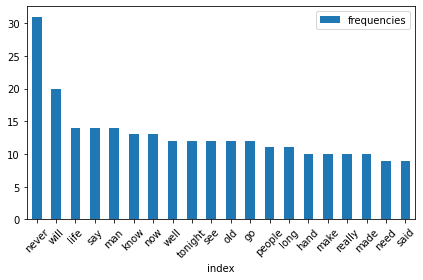

In [10]:
#bar graph of top 20 highest frequency words
import matplotlib.pyplot as plt
removed_largest_freq.set_index('index').plot.bar(rot=45)
plt.tight_layout()
plt.show()

In [11]:
#I had to define a new function to generate the word frequencies to build a wordcloud, becuase the wordcloud function does
#not accept dataframes as argument. The only difference between gen_freq() and gen_freq_wordcloud() is that the latter returns a
#series, the former a dataframe.
def gen_freq_wordcloud(text):
    #Will store the list of words per song
    word_list_per_song = []
    #will store list of words all together (not separated per song)
    word_list = []
    #Loop over all the songs and extract words into word_list_per_song
    for i in range(0,len(text)):
        word_list_per_song.append(nltk.word_tokenize(text[i]))#alternatively you can use TweetTokenizer(), it works in a similar way 
                                                        #but it will not split contractions 
                                                        #of verb and negation into two (e.g. "is" and "n't")
    #Loop over word_list_per_song and add all the words to the same list
    for i in range(0,len(word_list_per_song)):
        for j in range(0, len(word_list_per_song[i])):
            word_list.append(word_list_per_song[i][j])  
    #This might seem an unnecessary step. But, without this, the rest of the code wouldn't work: each song would be counted 
    #as a single element and the code would return frquency 1 for all the 11 songs, 
    #instead of returning the frequency of each word.
    #Create word frequencies using word_list    
    word_freq = pd.Series(word_list).value_counts()
    #frame = {'frequencies': word_freq }
    #result = pd.DataFrame(frame)
    return word_freq


Finally, this is the code to create a wordcloud. You can customise the shape of the wordcloud through the mask parameter - the cloud will take the shape of the image contained in the mask variable. 

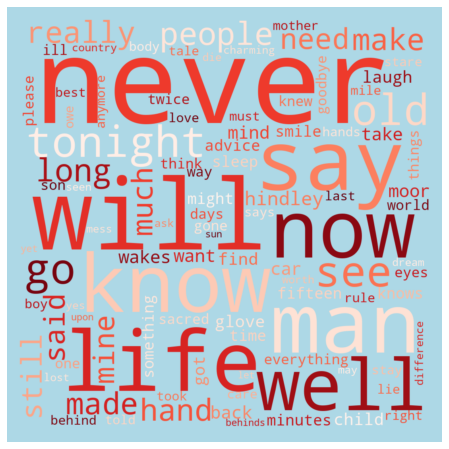

<Figure size 432x288 with 0 Axes>

In [12]:
#Generate word frequencies
word_freq = gen_freq_wordcloud(cleaned_songs)
removed_frequency = word_freq.drop(labels=STOPWORDS, errors='ignore')
my_word_set = {"oh", "n't", "'s", "'ve", "'ll", "'m", 'la', "'re", "'d", 'wo'}
new_removed_frequency = removed_frequency.drop(labels= my_word_set, errors='ignore')
#Generate word cloud
mask = np.array(Image.open("Exploring_Text_Data/mask_the_smiths.jpg"))
wc = WordCloud(width=400, height=330, max_words=100, background_color='lightblue', colormap='Reds', mask = mask).generate_from_frequencies(new_removed_frequency)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()
plt.savefig("the_smiths_cloud00.png", format="png")

I am sure you will have realised that you can personalise the wordcloud using different colour patterns for the words as well as the background - here's a link to different colour patterns https://matplotlib.org/stable/tutorials/colors/colormaps.html

I am quite pleased with the colour patterns I chose for this wordcloud: I tried to be as close as possible to the colours present in The Smiths album cover. I couldn't find exactmatches but this is close enough, I think.

If you scroll down, you will find how I concatenated the data from all datasets into a unique dataset to create a wordcloud wich encompasses all the albums of The Smiths. This is all you need to create your own wordcloud from your own favourite songs, poems, etc... But you can have a look at the rest of the code if you are interested in seeing the wordclouds for the other albums. 
Let's get on to the other albums now! :)

Album: Meat is Murder

In [13]:
#Load the dataset
dataset = pd.read_excel('Exploring_Text_Data/meat_is_murder_lyrics.xlsx')

dataset.head()

,Number,Title,Song
0,1,The Headmaster Ritual,Belligerent ghouls\nRun Manchester schools\nSp...
1,2,Rusholme Ruffians,Very old friend\nCame by today\nAs he was tell...
2,3,I want the one I can't have,On the day that your mentality\nDecides to try...
3,4,What She Said,"What she said:\n""How come someone hasn't notic..."
4,5,That Joke isn't Funny Anymore,Park the car at the side of the road\nYou shou...


In [14]:
songs = dataset.Song
cleaned_songs = clean_text(songs)

<ipython-input-3-c339a4307dc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = re.sub(r'[?!.('')";:,#@-]', ' ', text[i]) #deletes punctuation marks and symbols
<ipython-input-3-c339a4307dc3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = text[i].lower() #Convert to lowercase to maintain consistency


In [15]:
frequency = gen_freq(cleaned_songs)
print(frequency)

         frequencies
the               92
i                 70
and               63
in                55
a                 54
...              ...
brass              1
today              1
appeals            1
greedy             1
swines             1

[443 rows x 1 columns]


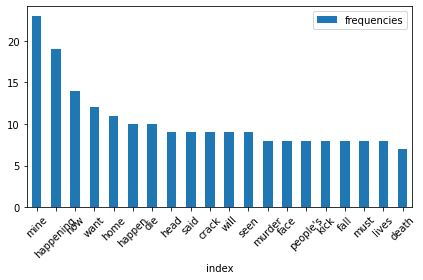

In [16]:
removed_frequency = frequency.drop(labels=STOPWORDS, errors='ignore')
my_word_set = {"oh", "n't", "'s", "'ve", "'ll", "'m", 'la', "'re", "'d", 'wo'}
new_removed_frequency = removed_frequency.drop(labels= my_word_set, errors='ignore')
removed_largest_freq = new_removed_frequency.nlargest(20, columns=['frequencies'])
removed_largest_freq = removed_largest_freq.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
removed_largest_freq.set_index('index').plot.bar(rot=45)
plt.tight_layout()
plt.show()

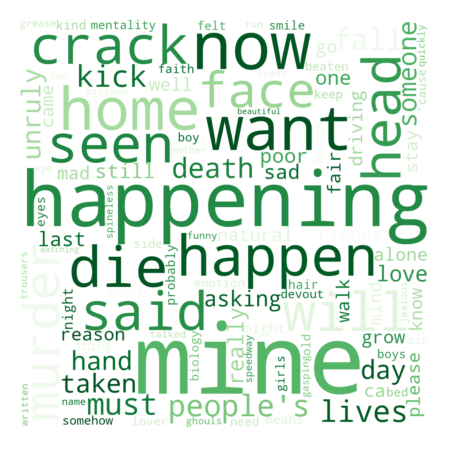

<Figure size 432x288 with 0 Axes>

In [17]:
#Generate word frequencies
word_freq = gen_freq_wordcloud(cleaned_songs)
removed_frequency = word_freq.drop(labels=STOPWORDS, errors='ignore')
my_word_set = {"oh", "n't", "'s", "'ve", "'ll", "'m", 'la', "'re", "'d", 'wo'}
new_removed_frequency = removed_frequency.drop(labels= my_word_set, errors='ignore')
#Generate word cloud
mask = np.array(Image.open("Exploring_Text_Data/mask_the_smiths.jpg"))
wc = WordCloud(width=400, height=330, max_words=100, background_color='white', colormap='Greens', mask = mask).generate_from_frequencies(new_removed_frequency)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()
plt.savefig("meat_is_murder_cloud00.png", format="png")

Album: The Queen is Dead

In [18]:
#Load the dataset
dataset = pd.read_excel('Exploring_Text_Data/the_queen_is_dead_lyrics.xlsx')

dataset.head()

,Number,Title,Song
0,1,The Queen is Dead,"Oh! Take me back to dear old Blighty,\nPut me ..."
1,2,"Frankly, Mr Shankly","Frankly, Mr. Shankly, this position I've held\..."
2,3,I know it's over,"Oh Mother, I can feel the soil falling over my..."
3,4,Never had No One Ever,When you walk without ease\nOn these streets w...
4,5,Cemetery Gates,A dreaded sunny day\nSo I meet you at the ceme...


In [19]:
songs = dataset.Song
cleaned_songs = clean_text(songs)

<ipython-input-3-c339a4307dc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = re.sub(r'[?!.('')";:,#@-]', ' ', text[i]) #deletes punctuation marks and symbols
<ipython-input-3-c339a4307dc3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = text[i].lower() #Convert to lowercase to maintain consistency


In [20]:
frequency = gen_freq(cleaned_songs)
print(frequency)

            frequencies
i                   115
and                 100
the                  89
to                   56
you                  54
...                 ...
castration            1
cover                 1
blighty               1
twenty                1
after                 1

[553 rows x 1 columns]


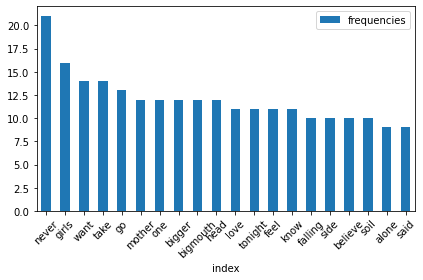

In [21]:
removed_frequency = frequency.drop(labels=STOPWORDS, errors='ignore')
my_word_set = {"oh", "n't", "'s", "'ve", "'ll", "'m", 'la', "'re", "'d", 'wo'}
new_removed_frequency = removed_frequency.drop(labels= my_word_set, errors='ignore')
#print(new_removed_frequency)
removed_largest_freq = new_removed_frequency.nlargest(20, columns=['frequencies'])
#print(removed_largest_freq)
removed_largest_freq = removed_largest_freq.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
removed_largest_freq.set_index('index').plot.bar(rot=45)
plt.tight_layout()
plt.show()

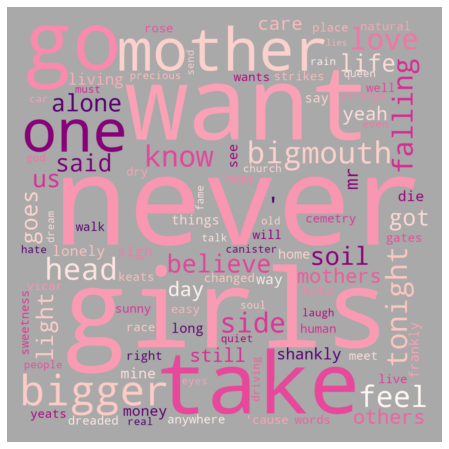

<Figure size 432x288 with 0 Axes>

In [22]:
#Generate word frequencies
word_freq = gen_freq_wordcloud(cleaned_songs)
removed_frequency = word_freq.drop(labels=STOPWORDS, errors='ignore')
my_word_set = {"oh", "n't", "'s", "'ve", "'ll", "'m", 'la', "'re", "'d", 'wo'}
new_removed_frequency = removed_frequency.drop(labels= my_word_set, errors='ignore')
#Generate word cloud
mask = np.array(Image.open("Exploring_Text_Data/mask_the_smiths.jpg"))
wc = WordCloud(width=400, height=330, max_words=100, background_color='darkgray', colormap='RdPu', mask = mask).generate_from_frequencies(new_removed_frequency)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()
plt.savefig("the_queen_is_dead_cloud00.png", format="png")

Album: Strangeways Here We Come

In [23]:
#Load the dataset
dataset = pd.read_excel('Exploring_Text_Data/strangeways_here_we_come_lyrics.xlsx')

dataset.head()

,Number,Title,Song
0,1,A Rush and a Push and the Land is Ours,"Oh hello, I am the ghost of Troubled Joe\nHung..."
1,2,I Started Something I Couldn't Finish,"The lanes were silent\nThere was nothing, no o..."
2,3,Death of a Disco Dancer,"The death of a disco dancer\nWell, it happens ..."
3,4,Girlfriend in a Coma,"Girlfriend in a coma, I know\nI know, it's ser..."
4,5,Stop Me if You Think You've Heard this One Before,"Stop me, oh, stop me\nStop me if you think tha..."


In [24]:
songs = dataset.Song
cleaned_songs = clean_text(songs)


<ipython-input-3-c339a4307dc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = re.sub(r'[?!.('')";:,#@-]', ' ', text[i]) #deletes punctuation marks and symbols
<ipython-input-3-c339a4307dc3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = text[i].lower() #Convert to lowercase to maintain consistency


In [25]:
frequency = gen_freq(cleaned_songs)
print(frequency)

           frequencies
i                  124
you                 83
and                 71
the                 68
me                  45
...                ...
slags                1
bed                  1
hatchet              1
strangled            1
own                  1

[445 rows x 1 columns]


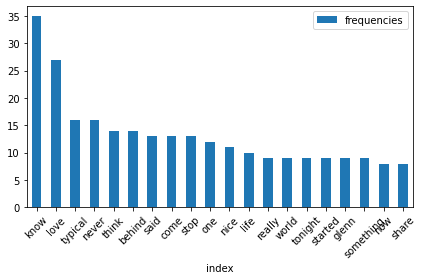

In [26]:
removed_frequency = frequency.drop(labels=STOPWORDS, errors='ignore')
my_word_set = {"oh", "n't", "'s", "'ve", "'ll", "'m", 'la', "'re", "'d", 'wo'}
new_removed_frequency = removed_frequency.drop(labels= my_word_set, errors='ignore')
#print(new_removed_frequency)
removed_largest_freq = new_removed_frequency.nlargest(20, columns=['frequencies'])
#print(removed_largest_freq)
removed_largest_freq = removed_largest_freq.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
removed_largest_freq.set_index('index').plot.bar(rot=45)
plt.tight_layout()
plt.show()

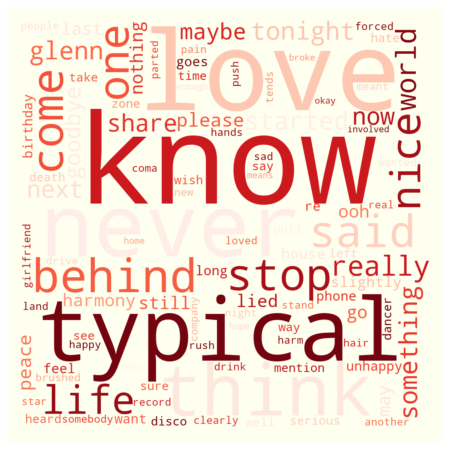

<Figure size 432x288 with 0 Axes>

In [27]:
#Generate word frequencies
word_freq = gen_freq_wordcloud(cleaned_songs)
removed_frequency = word_freq.drop(labels=STOPWORDS, errors='ignore')
my_word_set = {"oh", "n't", "'s", "'ve", "'ll", "'m", 'la', "'re", "'d", 'wo'}
new_removed_frequency = removed_frequency.drop(labels= my_word_set, errors='ignore')
#Generate word cloud
mask = np.array(Image.open("Exploring_Text_Data/mask_the_smiths.jpg"))
wc = WordCloud(width=400, height=330, max_words=100, background_color='ivory', colormap='Reds', mask = mask).generate_from_frequencies(new_removed_frequency)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()
plt.savefig("strangeways_here_we_come_cloud00.png", format="png")

Now I will make a bar graph and a wordcloud for the four albums together.

In [28]:
#First we read the four datasets again
dataset1 = pd.read_excel('Exploring_Text_Data/the_smiths_lyrics.xlsx')
dataset2 = pd.read_excel('Exploring_Text_Data/meat_is_murder_lyrics.xlsx')
dataset3 = pd.read_excel('Exploring_Text_Data/the_queen_is_dead_lyrics.xlsx')
dataset4 = pd.read_excel('Exploring_Text_Data/strangeways_here_we_come_lyrics.xlsx')

#We can use the concat() function offered by Pandas to concatenate the four dataframes
dataset = pd.concat([dataset1, dataset2, dataset3, dataset4], axis = 0, ignore_index = True)

dataset.head(40)

,Number,Title,Song
0,1,Reel Around the Fountain,It's time the tale were told\nOf how you took ...
1,2,You've got everything now,As merry as the days were long \nI was right a...
2,3,Miserable Lie,"So, goodbye\nPlease stay with your own kind\nA..."
3,4,Pretty Girls Make Graves,"Upon the sand, upon the bay\n""There is a quick..."
4,5,The Hand that Rocks the Cradle,Please don't cry\nFor the ghost and the storm ...
5,6,This Charming Man,Punctured bicycle\nOn a hillside desolate\nWil...
6,7,Still Ill,I decree today that life\nIs simply taking and...
7,8,Hand in Glove,Hand in glove\nThe sun shines out of our behin...
8,9,What Difference does it Make?,All men have secrets and here is mine\nSo let ...
9,10,I don't Owe You Anything,Bought on stolen wine\nA nod was the first ste...


In [29]:
songs = dataset.Song
cleaned_songs = clean_text(songs)

<ipython-input-3-c339a4307dc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = re.sub(r'[?!.('')";:,#@-]', ' ', text[i]) #deletes punctuation marks and symbols
<ipython-input-3-c339a4307dc3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[i] = text[i].lower() #Convert to lowercase to maintain consistency


In [30]:
frequency = gen_freq(cleaned_songs)
print(frequency)

             frequencies
i                    475
the                  347
and                  313
you                  287
oh                   192
...                  ...
wonderful              1
seconds                1
prose/poems            1
bald                   1
years                  1

[1311 rows x 1 columns]


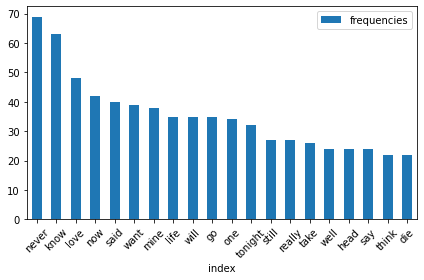

In [31]:
removed_frequency = frequency.drop(labels=STOPWORDS, errors='ignore')
my_word_set = {"oh", "n't", "'s", "'ve", "'ll", "'m", 'la', "'re", "'d", 'wo'}
new_removed_frequency = removed_frequency.drop(labels= my_word_set, errors='ignore')
#print(new_removed_frequency)
removed_largest_freq = new_removed_frequency.nlargest(20, columns=['frequencies'])
#print(removed_largest_freq)
removed_largest_freq = removed_largest_freq.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
removed_largest_freq.set_index('index').plot.bar(rot=45)
plt.tight_layout()
plt.show()

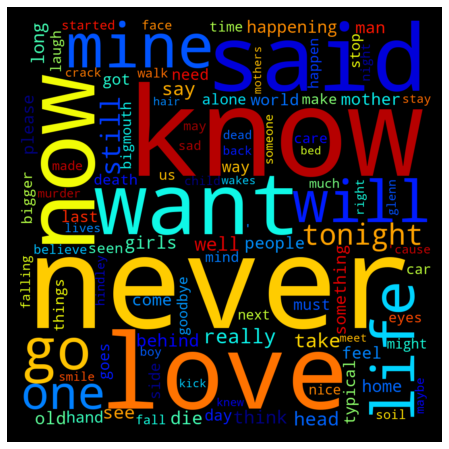

<Figure size 432x288 with 0 Axes>

In [32]:
#Generate word frequencies
word_freq = gen_freq_wordcloud(cleaned_songs)
removed_frequency = word_freq.drop(labels=STOPWORDS, errors='ignore')
my_word_set = {"oh", "n't", "'s", "'ve", "'ll", "'m", 'la', "'re", "'d", 'wo'}
new_removed_frequency = removed_frequency.drop(labels= my_word_set, errors='ignore')
#Generate word cloud
mask = np.array(Image.open("Exploring_Text_Data/mask_the_smiths.jpg"))
wc = WordCloud(width=400, height=330, max_words=100, background_color='black', colormap='jet', mask = mask).generate_from_frequencies(new_removed_frequency)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()
plt.savefig("all_the_smiths_cloud01.png", format="png")

I hope you have enjoyed this tutorial and the wordclouds I made. You might have noticed that a few albums are missing - I will try to add them as soon as possible, so that we can have an overview of the most common words across the whole production of The Smiths. Feel free to let me know what you think :)